In [74]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [100]:
cat = 'qvalues'
hparam = 'layers'

In [101]:
files = {}
for file in os.listdir("cartpole/pickles/"):
    if hparam in file and type in file:
        val = file.split(hparam+'_')[1].split('.')[0]
        files[val] = np.load(f'cartpole/pickles/{file}')['arr_0']

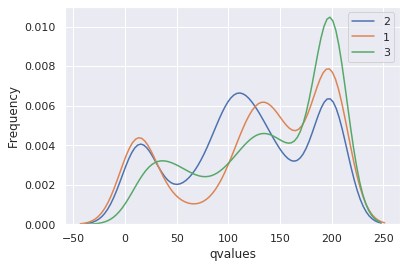

In [102]:
sns.set()
_ = plt.xlabel(cat)
_ = plt.ylabel("Frequency")
for x in files.keys():
    _ = sns.distplot(files[x], label=x, hist=False)
_ = plt.legend()